## 1. Introdução
___
A análise exploratória a seguir foi realizada utilizando dados da avalição de filmes fornecidas para a realização do desafio do Programa Lighthouse.
___
### 🎯Perguntas a serem respondidas:
* <spam>a - </spam>**Qual filme você recomendaria para uma pessoa que você não
conhece?**
<br>
Resposta: The Godfather (O Poderoso Chefão)
⭐ *IMDB: 9.2/10* 
<br><br>
* <spam>b - </spam>**Quais são os principais fatores que estão relacionados com alta
expectativa de faturamento de um filme?**
<br>
**Resposta:**
<br><br>
* <spam>c - </spam>**Quais insights podem ser tirados com a coluna Overview? É possível
inferir o gênero do filme a partir dessa coluna?**
<br>
**Resposta:** Localização em que se passa a história (Continente, cidade, país), profissão dos personagens envolvidas, nome dos personagens, faixa etária de personagens(criança, adolescente, jovem, adulto, idoso) e tipo de relacionamento entre os personagens (amizade, relacionamento amoroso, parentesco).<br>
✅**Sim**, pois certas palavras aparecem com maior frequência nas sinopses de cada gênero e dessa forma é possível calcular a probabilidade de pertencer a cada gênero. Exemplos claros obtidos através das nuvens de palavras são: <br>
<spam>- </spam>Crime: *Killer, detective, murder, death, gangster*
<br>
<spam>- </spam>Aventura: *Journey, gold, story, quest*
<br>
<spam>- </spam>Terror: *Possessed, haunted, halloween, demon*
___

## 2. Preparação para a análise

### 2.1 Importação das bibliotecas necessárias

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import sqlite3
import numpy as np

plt.style.use('ggplot')

a


### 2.2 Importação dos dados

In [32]:
imdb = pd.read_csv("data/desafio_indicium_imdb.csv", index_col=0, encoding='utf-8')
df = pd.DataFrame(imdb)
df.shape
df.head()

Series_Title Released_Year Certificate  \
1                                  The Godfather          1972           A   
2                                The Dark Knight          2008          UA   
3                         The Godfather: Part II          1974           A   
4                                   12 Angry Men          1957           U   
5  The Lord of the Rings: The Return of the King          2003           U   

   Runtime                     Genre  IMDB_Rating  \
1  175 min              Crime, Drama          9.2   
2  152 min      Action, Crime, Drama          9.0   
3  202 min              Crime, Drama          9.0   
4   96 min              Crime, Drama          9.0   
5  201 min  Action, Adventure, Drama          8.9   

                                            Overview  Meta_score  \
1  An organized crime dynasty's aging patriarch t...       100.0   
2  When the menace known as the Joker wreaks havo...        84.0   
3  The early life and career of Vito Corleone in ...        90.0   
4  A jury holdout attempts to prevent a miscarria...        96.0   
5  Gandalf and Aragorn lead the World of Men agai...        94.0   

               Director           Star1            Star2          Star3  \
1  Francis Ford Coppola   Marlon Brando        Al Pacino     James Caan   
2     Christopher Nolan  Christian Bale     Heath Ledger  Aaron Eckhart   
3  Francis Ford Coppola       Al Pacino   Robert De Niro  Robert Duvall   
4          Sidney Lumet     Henry Fonda      Lee J. Cobb  Martin Balsam   
5         Peter Jackson     Elijah Wood  Viggo Mortensen   Ian McKellen   

           Star4  No_of_Votes        Gross  
1   Diane Keaton      1620367  134,966,411  
2  Michael Caine      2303232  534,858,444  
3   Diane Keaton      1129952   57,300,000  
4   John Fiedler       689845    4,360,000  
5  Orlando Bloom      1642758  377,845,905

### 2.3 Identificação da presença de valores nulos e do tipo de dado em cada coluna

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 124.9+ KB


### 2.4 Limpeza e tratamento dos dados

In [34]:
df['Gross'] = df['Gross'].replace('[,]', '', regex=True).astype(float)
df['No_of_Votes'] = df['No_of_Votes'].replace('[,]', '', regex=True).astype(int)
df['Runtime'] = df['Runtime'].replace('[ min]', '', regex=True).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    int32  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int32  
 14  Gross          830 non-null    float64
dtypes: float64(3), int32(2), object(10)
memory usage: 117.1+ KB


___
## 3. Iniciando a análise

### 3.1 Os altos e baixos das principais variaveis quantitativas: Descobrindo quais filmes possuem o maior e o menor **número de votos**, **faturamento** e **média das avaliações no IMDB** e suas principais características.

In [35]:
#Qual o filme mais avaliado?
print(f'número total de votos: {df['No_of_Votes'].max()}')
index = df['No_of_Votes'].idxmax()
print(f'nome do filme: {df['Series_Title'][index]}')
print(f'gênero do filme: {df['Genre'][index]}')
print(f'ano de lançamento: {df['Released_Year'][index]}')
print(f'nota do filme: {df['IMDB_Rating'][index]}')
print(f'Meta Score: {df['Meta_score'][index]}')
print(f'Faturamento do filme: {df['Gross'][index]}')

número total de votos: 2303232
nome do filme: The Dark Knight
gênero do filme: Action, Crime, Drama
ano de lançamento: 2008
nota do filme: 9.0
Meta Score: 84.0
Faturamento do filme: 534858444.0


In [36]:
#Qual o filme menos avaliado?
print(f'número total de votos: {df['No_of_Votes'].min()}')
index = df['No_of_Votes'].idxmin()
print(f'nome do filme: {df['Series_Title'][index]}')
print(f'gênero do filme: {df['Genre'][index]}')
print(f'ano de lançamento: {df['Released_Year'][index]}')
print(f'nota do filme: {df['IMDB_Rating'][index]}')
print(f'Meta Score: {df['Meta_score'][index]}')
print(f'Faturamento do filme: {df['Gross'][index]}')

número total de votos: 25088
nome do filme: Ba wang bie ji
gênero do filme: Drama, Music, Romance
ano de lançamento: 1993
nota do filme: 8.1
Meta Score: nan
Faturamento do filme: 5216888.0


In [37]:
#filme com maior faturamento?
print(f'Faturamento máximo: {df['Gross'].max()}')
index = df['Gross'].idxmax()
print(f'nome do filme: {df['Series_Title'][index]}')
print(f'gênero do filme: {df['Genre'][index]}')
print(f'ano de lançamento: {df['Released_Year'][index]}')
print(f'nota do filme: {df['IMDB_Rating'][index]}')
print(f'Meta Score máximo: {df['Meta_score'].max()}')
print(f'número total de votos: {df['No_of_Votes'][index]}')

Faturamento máximo: 936662225.0
nome do filme: Star Wars: Episode VII - The Force Awakens
gênero do filme: Action, Adventure, Sci-Fi
ano de lançamento: 2015
nota do filme: 7.9
Meta Score máximo: 100.0
número total de votos: 860823


In [38]:
#filme com menor faturamento?
print(f'Faturamento mínimo: {df['Gross'].min()}')
index = df['Gross'].idxmin()
print(f'nome do filme: {df['Series_Title'][index]}')
print(f'gênero do filme: {df['Genre'][index]}')
print(f'ano de lançamento: {df['Released_Year'][index]}')
print(f'nota do filme: {df['IMDB_Rating'][index]}')
print(f'Meta Score mínimo: {df['Meta_score'].min()}')
print(f'número total de votos: {df['No_of_Votes'][index]}')

Faturamento mínimo: 1305.0
nome do filme: Adams æbler
gênero do filme: Comedy, Crime, Drama
ano de lançamento: 2005
nota do filme: 7.8
Meta Score mínimo: 28.0
número total de votos: 45717


In [61]:
#Filme com maior nota IMDB?
print(f'Maior nota: {df['IMDB_Rating'].max()}')
index = df['IMDB_Rating'].idxmax()
print(f'nome do filme: {df['Series_Title'][index]}')
print(f'gênero do filme: {df['Genre'][index]}')
print(f'ano de lançamento: {df['Released_Year'][index]}')
print(f'Meta Score máximo: {df['Meta_score'][index]}')
print(f'Faturamento do filme: {df['Gross'][index]}')

Maior nota: 9.2
nome do filme: The Godfather
gênero do filme: Crime, Drama
ano de lançamento: 1972
Meta Score máximo: 100.0
Faturamento do filme: 134966411.0


In [62]:
#filme com menor nota no IMDB?
print(f'Menor nota: {df['IMDB_Rating'].min()}')
index = df['IMDB_Rating'].idxmin()
print(f'nome do filme: {df['Series_Title'][index]}')
print(f'gênero do filme: {df['Genre'][index]}')
print(f'ano de lançamento: {df['Released_Year'][index]}')
print(f'Meta Score mínimo: {df['Meta_score'][index]}')
print(f'Faturamento do filme: {df['Gross'][index]}')

Menor nota: 7.6
nome do filme: Dark Waters
gênero do filme: Biography, Drama, History
ano de lançamento: 2019
Meta Score mínimo: 73.0
Faturamento do filme: nan


### 3.2 Analisando a correlação entre as variáveis quantitativas

Text(0.5, 1.0, 'Correlação entre variáveis quantitativas')

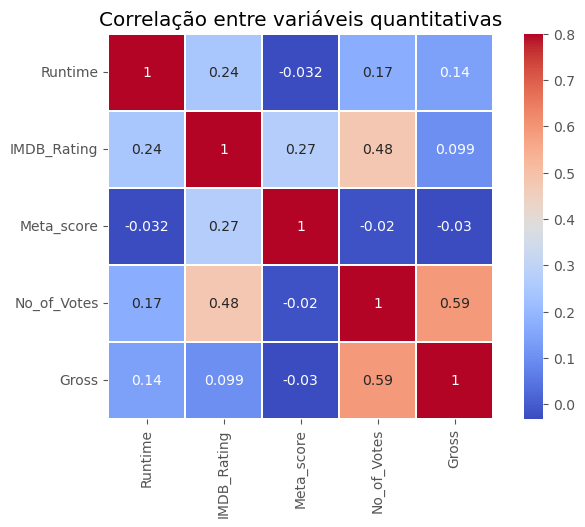

In [60]:
df_heat = df[['Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']]
corr =df_heat.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, vmax=.8, linewidth=.01, square=True, annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis quantitativas')

In [65]:
print(df_heat.corr())

              Runtime  IMDB_Rating  Meta_score  No_of_Votes     Gross
Runtime      1.000000     0.242751   -0.031604     0.172483  0.140002
IMDB_Rating  0.242751     1.000000    0.271374     0.479308  0.099393
Meta_score  -0.031604     0.271374    1.000000    -0.020091 -0.030480
No_of_Votes  0.172483     0.479308   -0.020091     1.000000  0.589527
Gross        0.140002     0.099393   -0.030480     0.589527  1.000000


___
## 4. Buscando uma resposta para as perguntas propostas

### 4.1 Qual filme realmente pode ser considerado o melhor pela audiência?
<p>Essa pergunta parece ser simples, mas não basta apenas escolher o que tem as maiores médias de avaliação pelos telespectadores e críticos, se o número de votos for consideravelmente menor. A pergunta aqui é: Como encontrar o equilibrio a partir das duas variáveis para encontrar uma recomendação certeira?</p>

#### 4.1.1 Encontrando os filmes com as melhores avaliações e mais votados no IMDB

In [42]:
conn = sqlite3.connect(':memory:')
df.to_sql('movies', conn, index=False, if_exists='replace')
result_df = pd.read_sql('SELECT Series_Title, No_of_Votes,IMDB_Rating FROM movies WHERE IMDB_Rating >= 8 ORDER BY No_of_Votes DESC LIMIT(5)', conn)
print(result_df)

      Series_Title  No_of_Votes  IMDB_Rating
0  The Dark Knight      2303232          9.0
1        Inception      2067042          8.8
2       Fight Club      1854740          8.8
3     Pulp Fiction      1826188          8.9
4     Forrest Gump      1809221          8.8


In [ ]:
result_df = pd.read_sql('SELECT Series_Title, No_of_Votes,IMDB_Rating FROM movies WHERE IMDB_Rating >= 9 ORDER BY No_of_Votes DESC LIMIT(5)', conn)
print(result_df)

             Series_Title  No_of_Votes  IMDB_Rating
0         The Dark Knight      2303232          9.0
1           The Godfather      1620367          9.2
2  The Godfather: Part II      1129952          9.0
3            12 Angry Men       689845          9.0


In [79]:
result_df = pd.read_sql('SELECT Series_Title, No_of_Votes,IMDB_Rating FROM movies WHERE IMDB_Rating >= 9 ORDER BY IMDB_Rating DESC, No_of_Votes DESC LIMIT(10)', conn)
result_df.head(10)

Series_Title  No_of_Votes  IMDB_Rating
0           The Godfather      1620367          9.2
1         The Dark Knight      2303232          9.0
2  The Godfather: Part II      1129952          9.0
3            12 Angry Men       689845          9.0

<p>Poderiamos parar por aqui pensando que "The Godfather" é o melhor filme, mas qual seria realmente o resultado das próximas colocações?</p>

In [89]:
result_df = pd.read_sql('SELECT Series_Title, No_of_Votes,IMDB_Rating FROM movies ORDER BY IMDB_Rating Desc, No_of_Votes DESC LIMIT(10)', conn)
result_df.head(10)

Series_Title  No_of_Votes  IMDB_Rating
0                                  The Godfather      1620367          9.2
1                                The Dark Knight      2303232          9.0
2                         The Godfather: Part II      1129952          9.0
3                                   12 Angry Men       689845          9.0
4                                   Pulp Fiction      1826188          8.9
5  The Lord of the Rings: The Return of the King      1642758          8.9
6                               Schindler's List      1213505          8.9
7                                      Inception      2067042          8.8
8                                     Fight Club      1854740          8.8
9                                   Forrest Gump      1809221          8.8

<p>Quando consideramos tal tendência não podemos ignorar, pois o peso da variável precisa sim ser considerado para encontrar uma real resposta.</p>
<p>🧠💡Uma forma de remover a alta influência causado pelo número de avaliações (No_of_Votes), encontrada não só nas queries acimas mas também indicadas com uma correlação de 0.48, é utilizando a Média Bayesiana.</p>

#### 4.1.2 Calculando a média Bayesiana e armazenando a informação obtida na coluna 'Bayesian_Avg'

In [46]:
total_sum_ratings = (df['IMDB_Rating'] * df['No_of_Votes']).sum()
total_votes = df['No_of_Votes'].sum()
global_true_mean = total_sum_ratings / total_votes

print(f"Média Global Verdadeira (m): {global_true_mean:.6f}")
print(f"Total de Votos no Sistema: {total_votes:,}")

Média Global Verdadeira (m): 8.101988
Total de Votos no Sistema: 271,349,801


In [47]:
C = df['No_of_Votes'].quantile(0.9)
print(f"\nConstante de Confiança (C - 90º percentil de votos): {C:.0f}")


Constante de Confiança (C - 90º percentil de votos): 694913


In [48]:
df['Bayesian_Avg'] = ((C * global_true_mean) + (df['IMDB_Rating'] * df['No_of_Votes']) )/(C + df['No_of_Votes'])
df['Bayesian_Avg'] = df['Bayesian_Avg'].round(5)

In [49]:
rank_df = df[['Series_Title', 'IMDB_Rating', 'No_of_Votes', 'Bayesian_Avg']].copy()
rank_df['Difference'] = rank_df['Bayesian_Avg'] - rank_df['IMDB_Rating']
beneficiados = rank_df.nlargest(10, 'Difference')[['Series_Title', 'No_of_Votes', 'IMDB_Rating', 'Bayesian_Avg', 'Difference']]
punidos = rank_df.nsmallest(10, 'Difference')[['Series_Title', 'No_of_Votes', 'IMDB_Rating', 'Bayesian_Avg', 'Difference']]
print(beneficiados.to_string(index=False))
print('\n')
print(punidos.to_string(index=False))

       Series_Title  No_of_Votes  IMDB_Rating  Bayesian_Avg  Difference
   The Long Goodbye        26337          7.6       8.08366     0.48366
           Lifeboat        26471          7.6       8.08357     0.48357
  Omohide poro poro        27071          7.6       8.08317     0.48317
     On Golden Pond        27650          7.6       8.08278     0.48278
           Nelyubov        29765          7.6       8.08137     0.48137
       Giù la testa        30144          7.6       8.08112     0.48112
The Secret of Kells        31779          7.6       8.08004     0.48004
   The Muppet Movie        32802          7.6       8.07936     0.47936
     Watership Down        33656          7.6       8.07880     0.47880
              Giant        34075          7.6       8.07852     0.47852


                   Series_Title  No_of_Votes  IMDB_Rating  Bayesian_Avg  Difference
                        Seppuku        42004          8.6       8.13037    -0.46963
                Soorarai Pottru       

<p>Acima podemos ver os 10 filmes mais beneficiados e mais prejudicados após a aplicação da média bayesiana.</p>

In [50]:
df.to_sql('movies', conn, index=False, if_exists='replace')
result_df = pd.read_sql('SELECT Series_Title,Bayesian_Avg FROM movies WHERE Bayesian_Avg >= 8 ORDER BY Bayesian_Avg DESC LIMIT(10)', conn)
result_df.head(10)

Series_Title  Bayesian_Avg
0                                      The Godfather       8.87044
1                                    The Dark Knight       8.79186
2                                       Pulp Fiction       8.68004
3      The Lord of the Rings: The Return of the King       8.66278
4                             The Godfather: Part II       8.65803
5                                          Inception       8.62438
6                                         Fight Club       8.60976
7                                   Schindler's List       8.60942
8                                       Forrest Gump       8.60630
9  The Lord of the Rings: The Fellowship of the Ring       8.59415

<p>Levando em consideração a Média Bayesiana podemos notar que a ordenação do ranking se mostra diferente da obtida anteriormente, seja a que considerava ou a que desconsiderava o número de votos. Agora estamos trabalhando com um novo índice (Bayesian_Avg), que busca equilibrar o impacto da  da variável No_of_Votes sobre a variável IMDB_Rating.</p>

### 4.3 A influência do gênero na  de um filme
<p>Será que existem palavras usadas com maior frequência na sinopse de cada gênero?</p>

#### 4.3.1 Quantos são os diferentes gêneros e combinações presentes? Como podemos concentrar melhor as informações?

In [97]:
print(df['Genre'].value_counts())

Genre
Drama                        84
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Adventure, Thriller           1
Animation, Action, Sci-Fi     1
Action, Crime, Comedy         1
Animation, Crime, Mystery     1
Adventure, Comedy, War        1
Name: count, Length: 202, dtype: int64


<p>Como alguns gêneros são combinações de gêneros, iremos separar cada gênero dentro das strings e pegar o primeiro, gênero principal, e atribuí-lo à coluna 'Main_Genre'.</p>

In [51]:
df['Main_Genre'] = df['Genre'].str.split(',').str[0]
sinopses_por_genero = df.groupby('Main_Genre')['Overview'].apply(lambda x: ' '.join(x.astype(str))).reset_index()
print(sinopses_por_genero.head())

  Main_Genre                                           Overview
0     Action  When the menace known as the Joker wreaks havo...
1  Adventure  A team of explorers travel through a wormhole ...
2  Animation  During her family's move to the suburbs, a sul...
3  Biography  In German-occupied Poland during World War II,...
4     Comedy  Greed and class discrimination threaten the ne...


In [52]:
generos = df['Main_Genre'].unique()
print(generos)

['Crime' 'Action' 'Biography' 'Drama' 'Western' 'Comedy' 'Adventure'
 'Animation' 'Horror' 'Mystery' 'Film-Noir' 'Fantasy' 'Family' 'Thriller']


<p>Agora temos a 'Overview' de todos os filmes concatenadas em uma única string para cada 'Main_Genre', e possuímos uma maior concentração dos dados para trabalhar</p>

#### 4.3.2 Gerando as nuvens de palavras de cada gênero

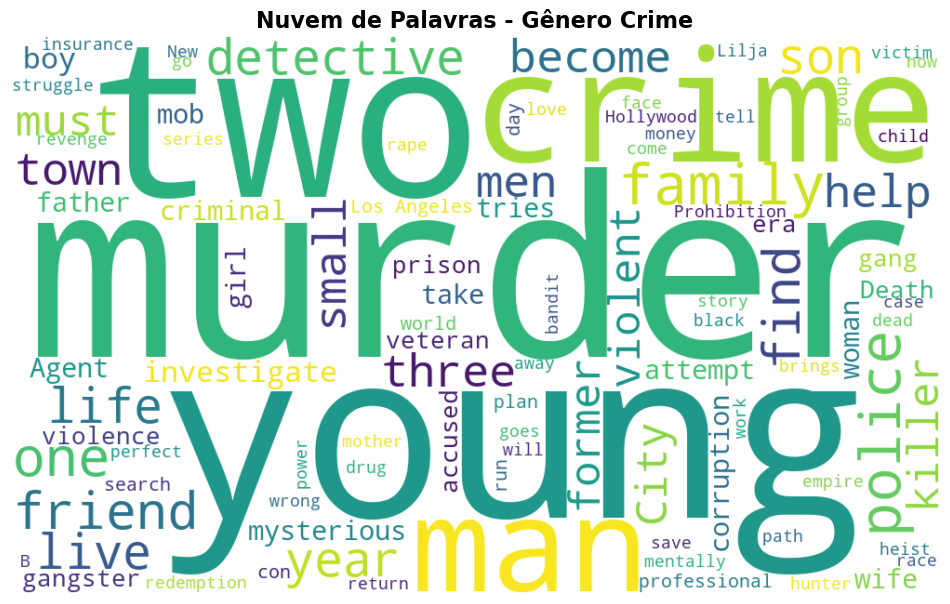

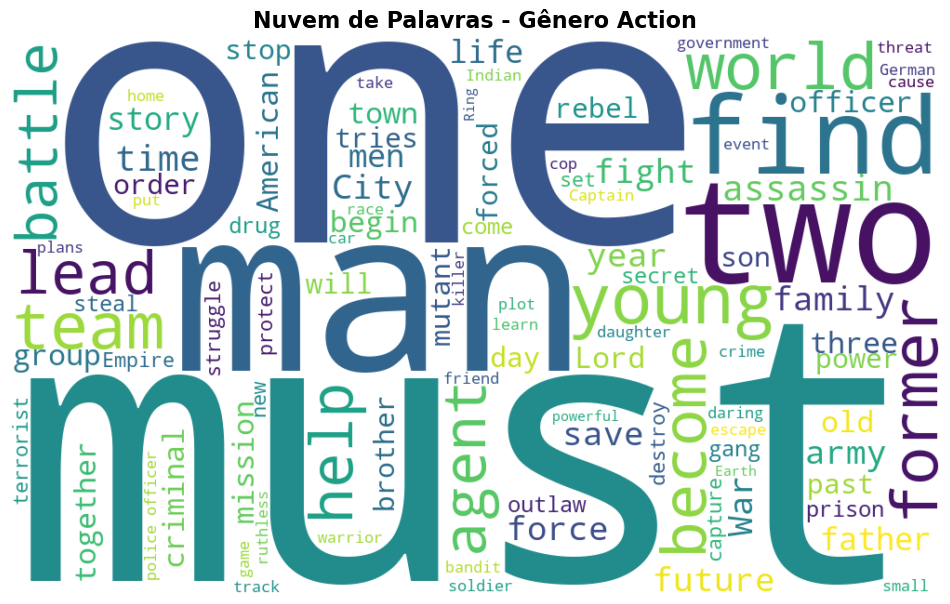

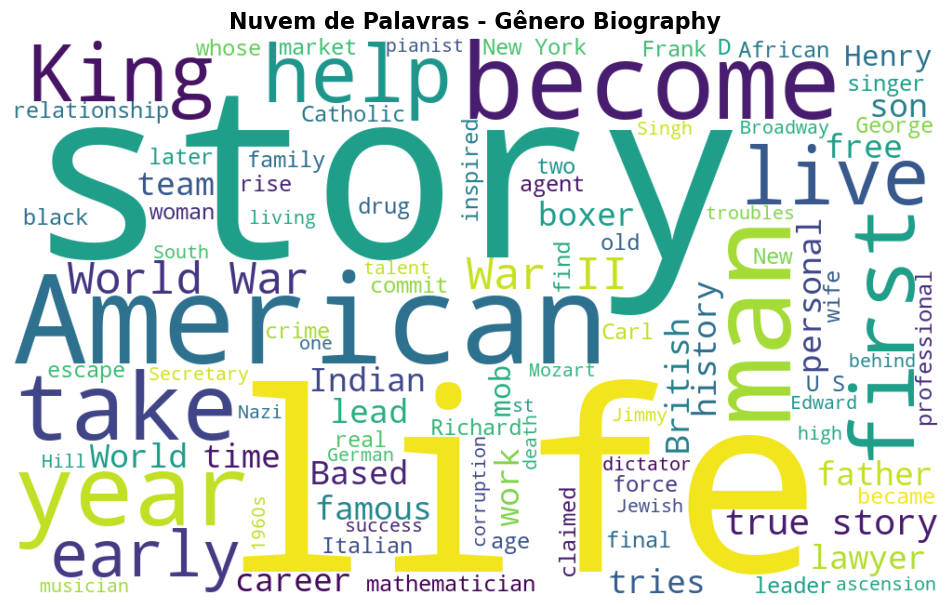

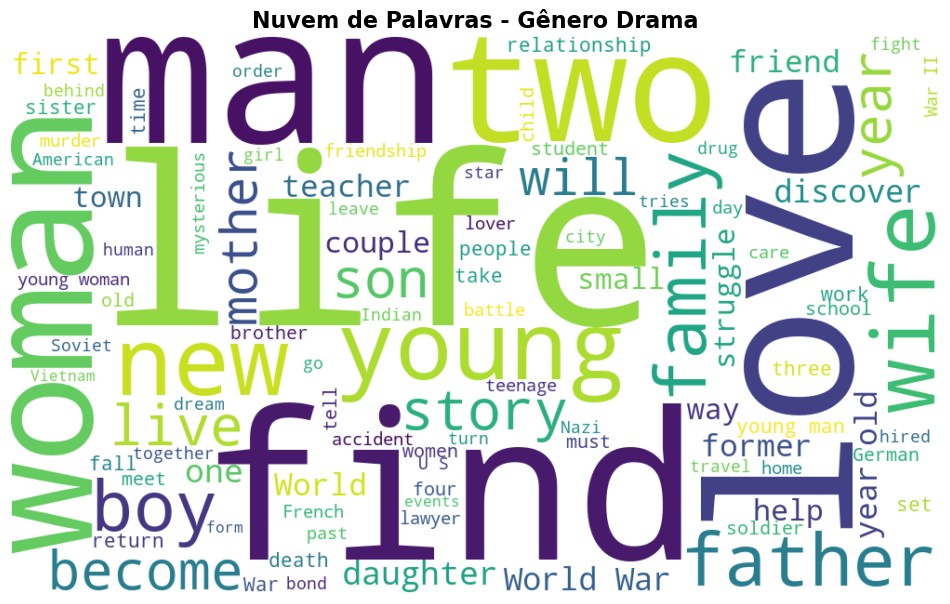

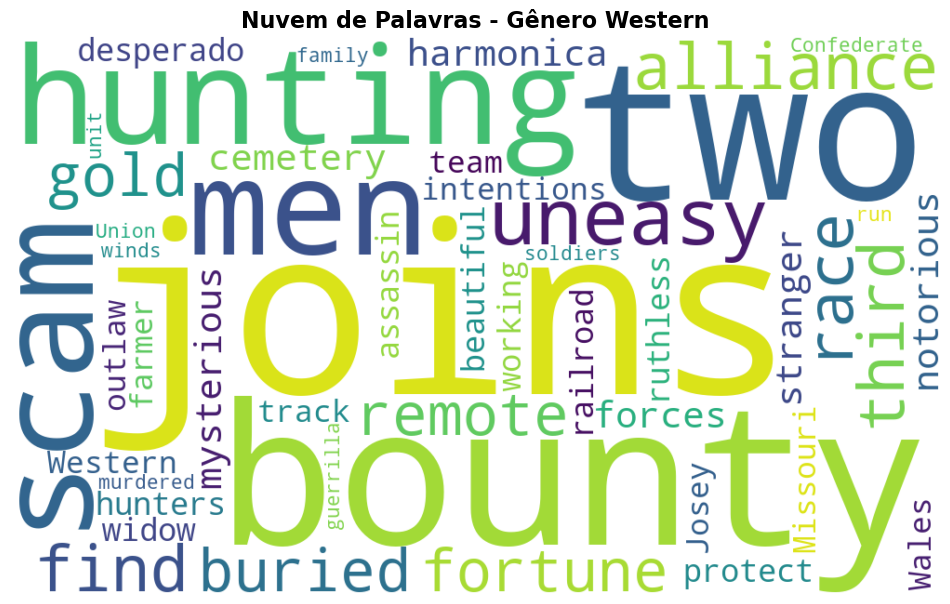

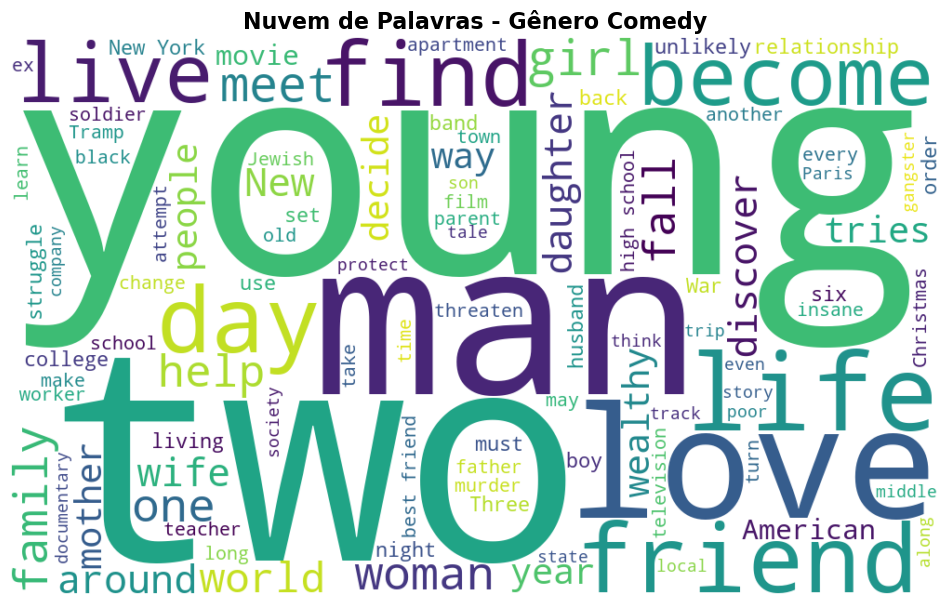

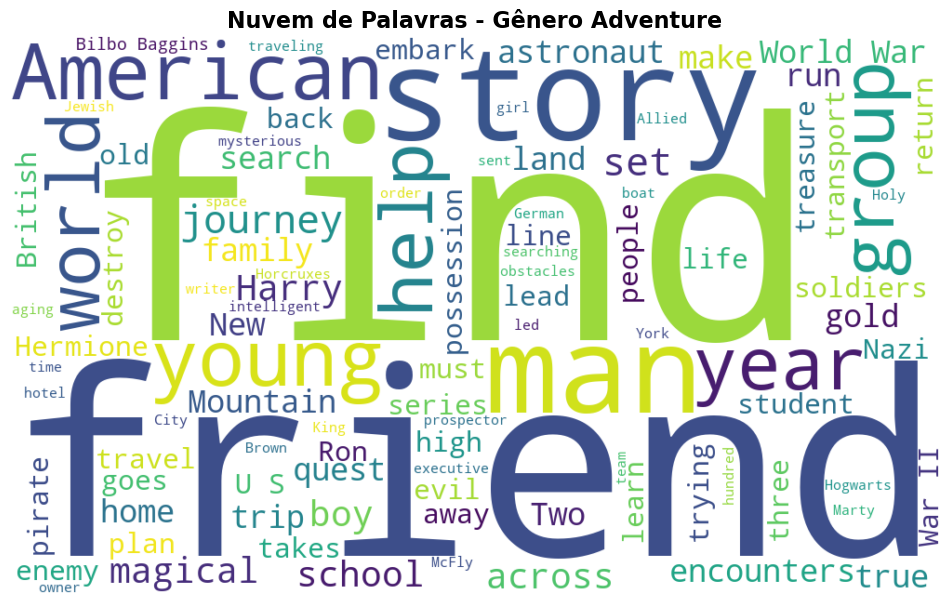

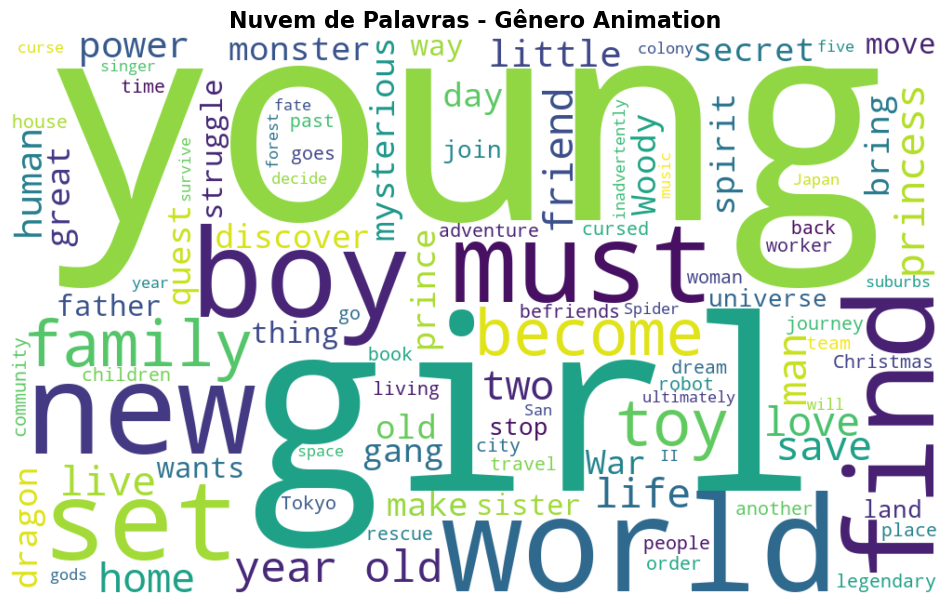

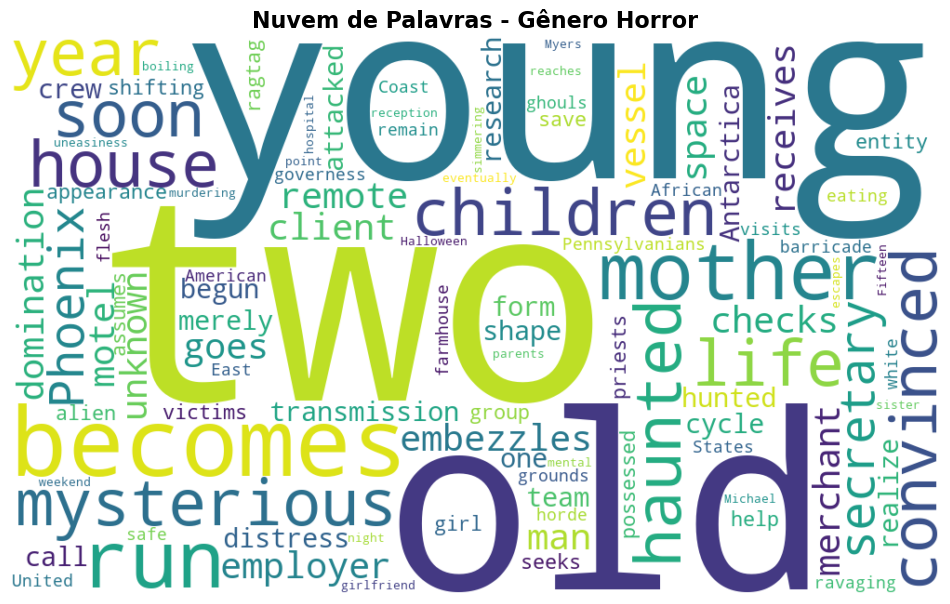

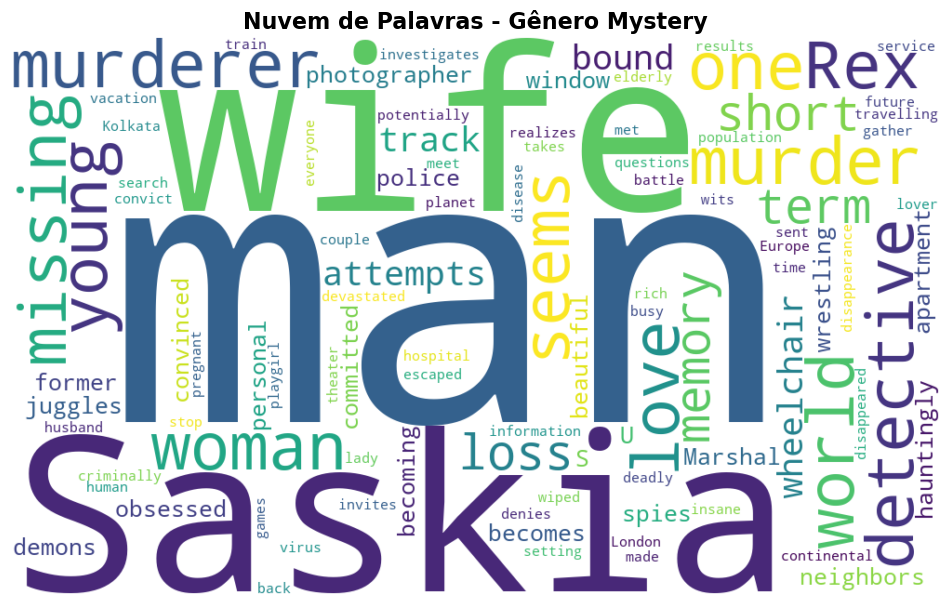

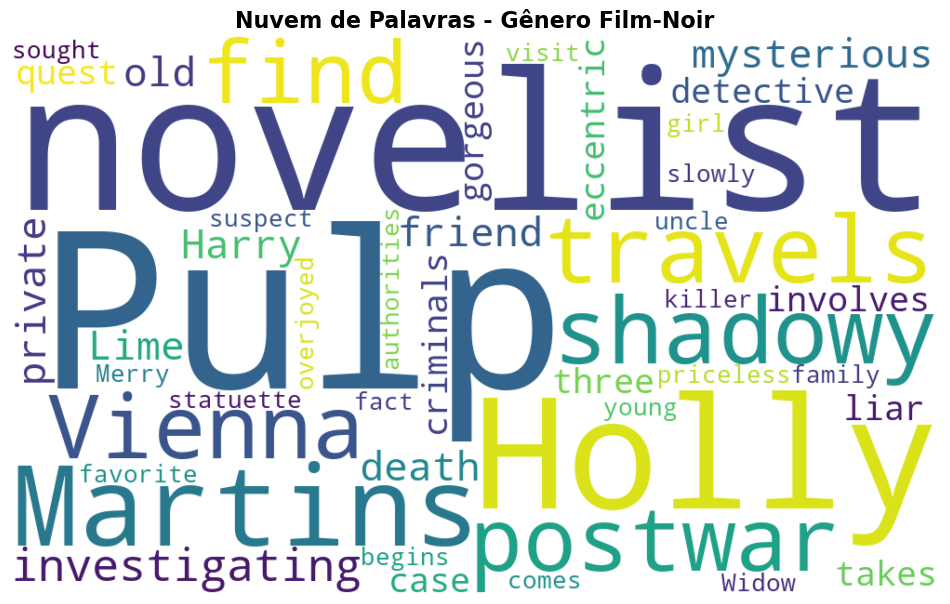

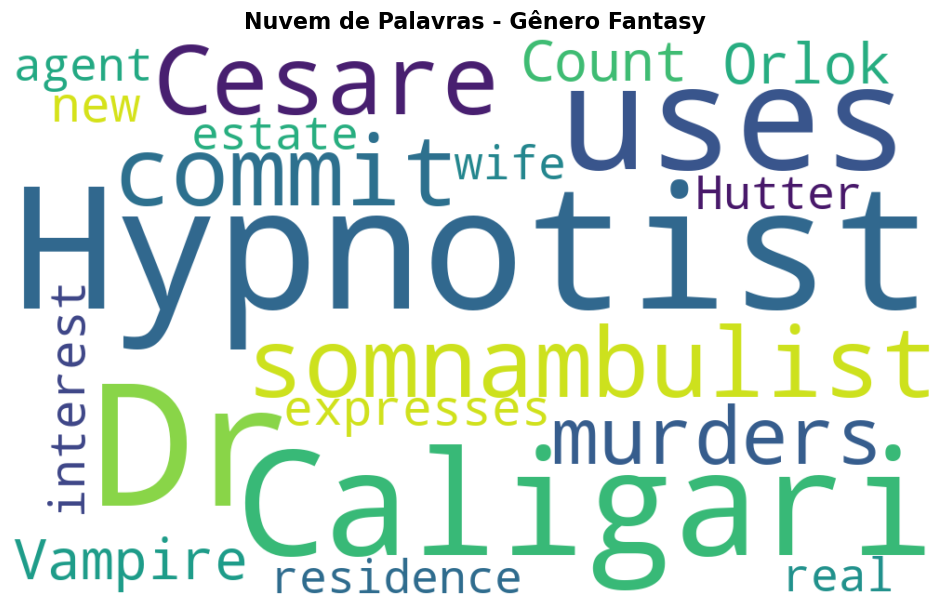

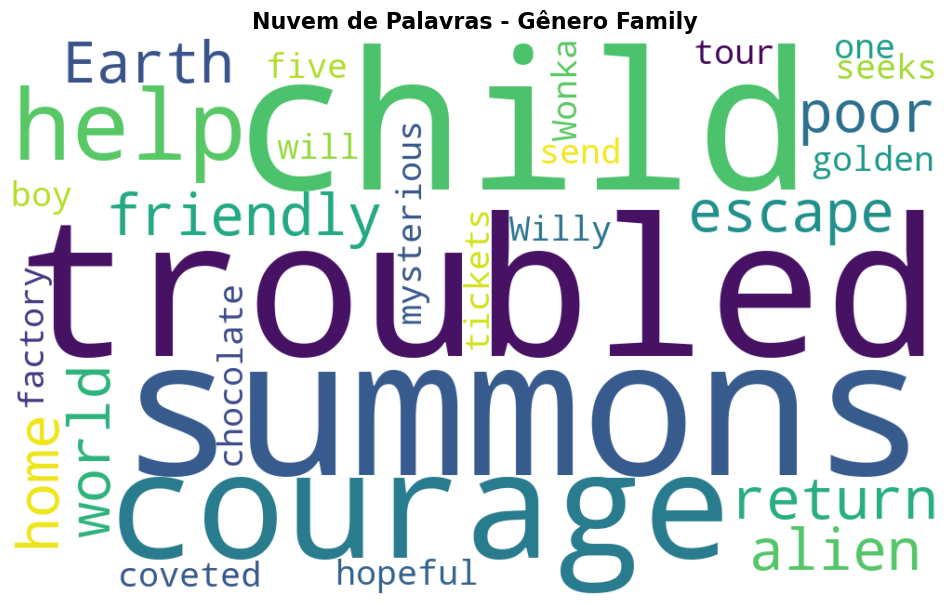

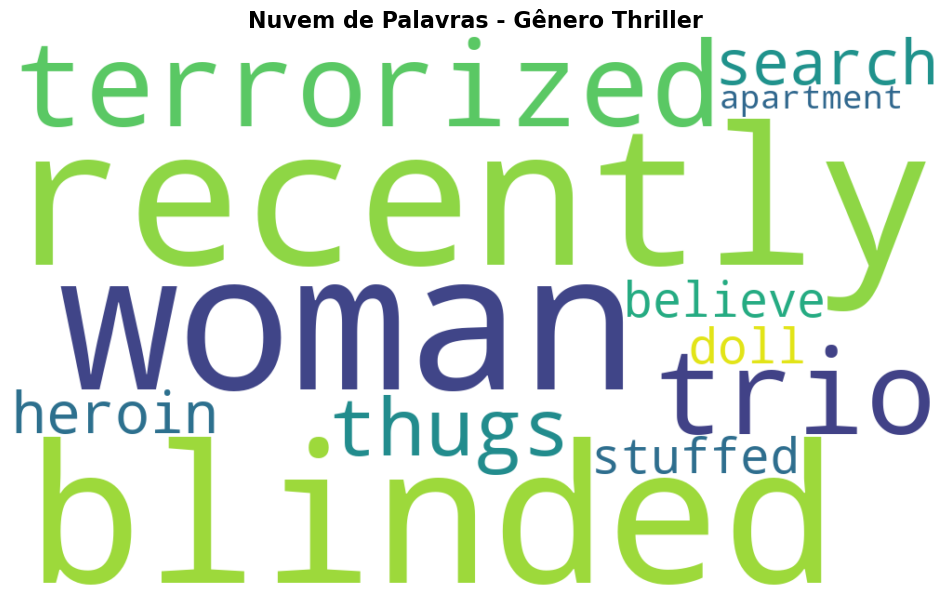

In [53]:
for genero in generos:
    drama_text = sinopses_por_genero[sinopses_por_genero['Main_Genre'] == genero]['Overview'].values[0]

    plt.figure(figsize=(12, 8))
    wordcloud = WordCloud(width=1000, height=600, background_color='white', max_words=100).generate(drama_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nuvem de Palavras - Gênero {genero}', fontsize=16, fontweight='bold')
    plt.show()


<p>Visualizando as nuvens de palavras podemos perceber que existe sim a possibilidade de extrair insights e até mesmo identificar o gênero de um filme a partir da sua 'Overvies' (sinopse).</p>
<br>

___